In [1]:
# We install the seaborn library for pairplot.
!pip install -q seaborn

In [2]:
# We then install other libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

We then go ahead to import TensorFlow. It is the library that will help us create the Deep Learning model. We also check the version.

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


Now, we import the data

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv'

df = pd.read_csv(url)

In [ ]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
df.tail()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [ ]:
df.dtypes

DateTime                      object
Temperature                  float64
Humidity                     float64
Wind Speed                   float64
general diffuse flows        float64
diffuse flows                float64
Zone 1 Power Consumption     float64
Zone 2  Power Consumption    float64
Zone 3  Power Consumption    float64
dtype: object

In [ ]:
len(df)

52416

In [ ]:
df.shape

(52416, 9)

In [ ]:
list(df.columns)

['DateTime',
 'Temperature',
 'Humidity',
 'Wind Speed',
 'general diffuse flows',
 'diffuse flows',
 'Zone 1 Power Consumption',
 'Zone 2  Power Consumption',
 'Zone 3  Power Consumption']

In [7]:
df.rename(
    columns={'Wind Speed': 'WindSpeed', 'general diffuse flows': 'generaldiffuseflows', 'diffuse flows': "diffuseflows", 'Zone 1 Power Consumption': 'Zone1PowerConsumption',
             'Zone 2  Power Consumption': 'Zone2PowerConsumption', 'Zone 3  Power Consumption': 'Zone3PowerConsumption'},
    inplace=True,
)

df

,DateTime,Temperature,Humidity,WindSpeed,generaldiffuseflows,diffuseflows,Zone1PowerConsumption,Zone2PowerConsumption,Zone3PowerConsumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


Now, we check for missing values

In [ ]:
df.isna().sum()

DateTime                 0
Temperature              0
Humidity                 0
WindSpeed                0
generaldiffuseflows      0
diffuseflows             0
Zone1PowerConsumption    0
Zone2PowerConsumption    0
Zone3PowerConsumption    0
dtype: int64

In [ ]:
df.isnull().any()

DateTime                 False
Temperature              False
Humidity                 False
WindSpeed                False
generaldiffuseflows      False
diffuseflows             False
Zone1PowerConsumption    False
Zone2PowerConsumption    False
Zone3PowerConsumption    False
dtype: bool

In [ ]:
df = df.drop('DateTime', axis=1)

In [ ]:
df

,Temperature,Humidity,WindSpeed,generaldiffuseflows,diffuseflows,Zone1PowerConsumption,Zone2PowerConsumption,Zone3PowerConsumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


As we can see, there are no categorical columns in the data

We are going to try to use linear regression and deep learning models to predict the Temperature variable in this dataset.

We split the data into train and test sets

In [6]:
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

Now we plot the data

In [ ]:
list(df.columns)

['Temperature',
 'Humidity',
 'WindSpeed',
 'generaldiffuseflows',
 'diffuseflows',
 'Zone1PowerConsumption',
 'Zone2PowerConsumption',
 'Zone3PowerConsumption']

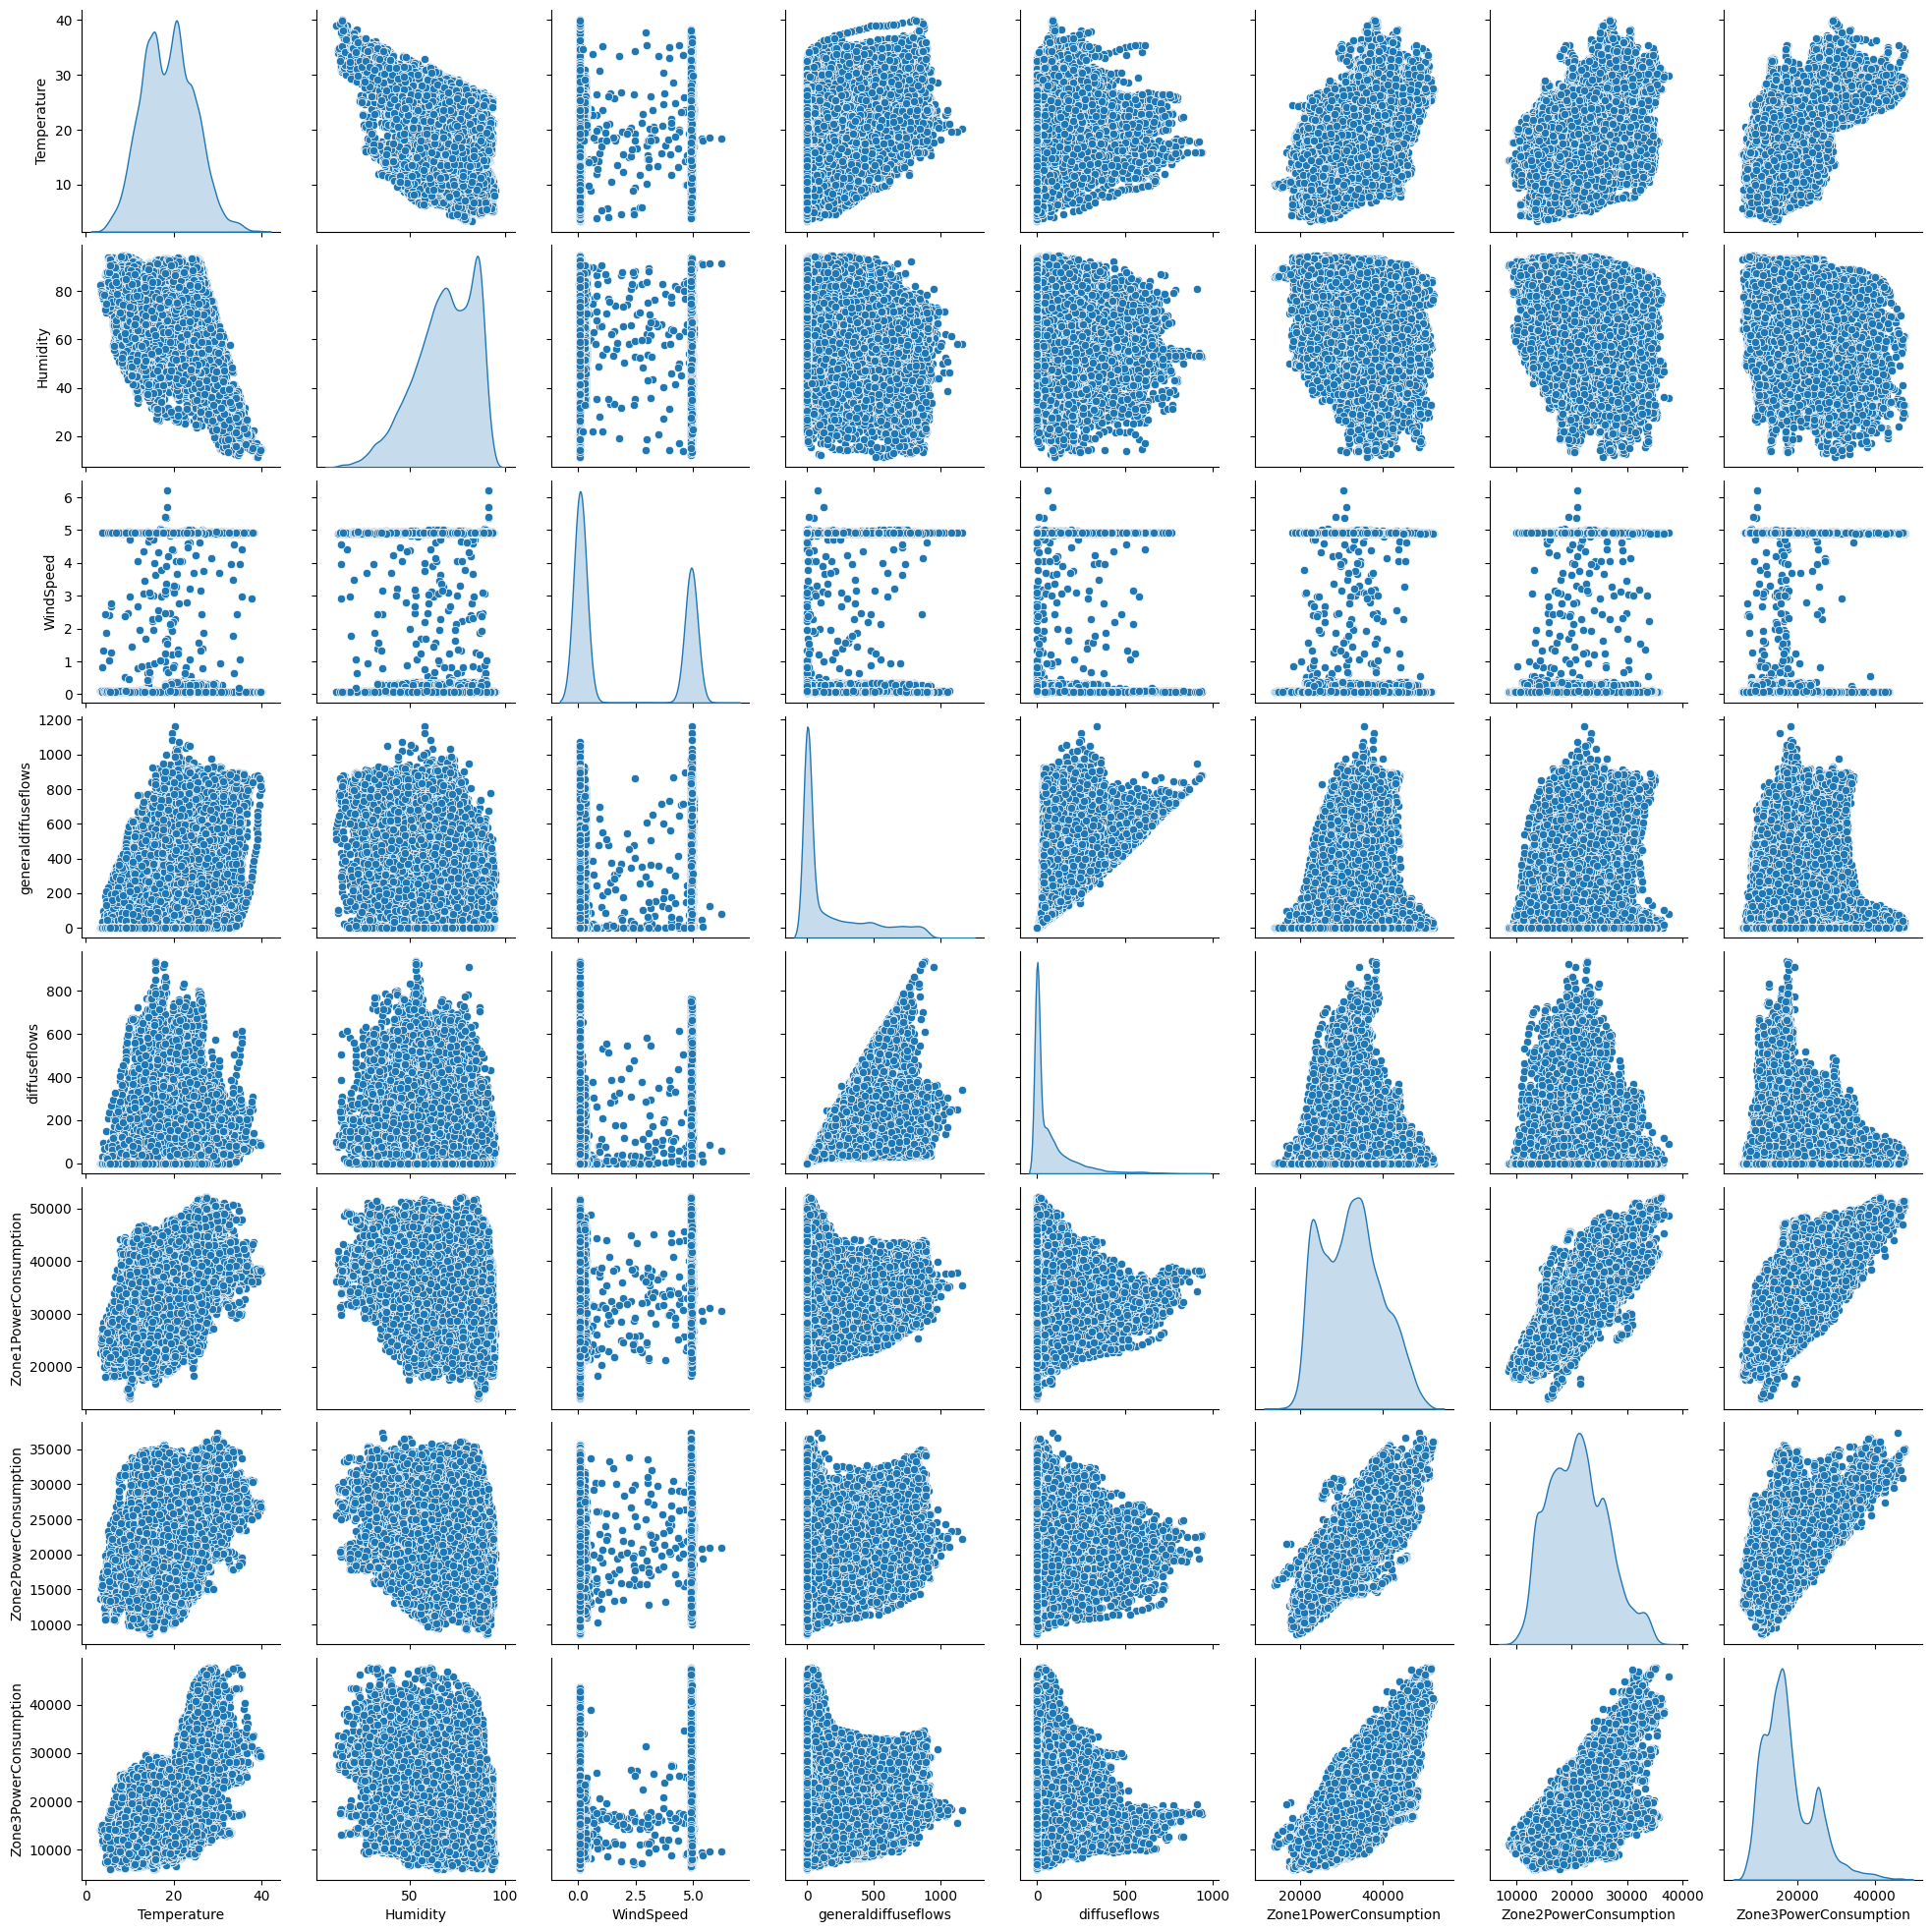

In [ ]:
sns.pairplot(train_df[[ 'Temperature',
 'Humidity',
 'WindSpeed',
 'generaldiffuseflows',
 'diffuseflows',
 'Zone1PowerConsumption',
 'Zone2PowerConsumption',
 'Zone3PowerConsumption']], diag_kind='kde')

We now check the statistics of the dataset

In [10]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,41933.0,18.823319,5.827207,3.247000,14.41000,18.80000,22.95000,40.01000
Humidity,41933.0,68.237543,15.552758,11.340000,58.25000,69.78000,81.40000,94.80000
Wind Speed,41933.0,1.957284,2.348209,0.050000,0.07800,0.08600,4.91500,6.20000
general diffuse flows,41933.0,183.770044,265.336651,0.004000,0.06200,5.15500,323.80000,1163.00000
diffuse flows,41933.0,75.156354,124.409846,0.011000,0.12200,4.56300,101.20000,936.00000
Zone 1 Power Consumption,41933.0,32346.113512,7110.017460,13932.151900,26348.53392,32292.76596,37274.52471,52204.39512
Zone 2 Power Consumption,41933.0,21044.273146,5187.068347,8633.401222,17000.83160,20823.10030,24692.23688,37408.86076
Zone 3 Power Consumption,41933.0,17832.998010,6621.765423,5935.174070,13140.00000,16409.03226,21623.31984,47598.32636


Now, we split the features from the labels

In [11]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('Temperature')
test_labels = test_features.pop('Temperature')

Next, we normalize the data

In [ ]:
train_df.describe().transpose()[['mean', 'std']]

,mean,std
Temperature,18.823319,5.827207
Humidity,68.237543,15.552758
WindSpeed,1.957284,2.348209
generaldiffuseflows,183.770044,265.336651
diffuseflows,75.156354,124.409846
Zone1PowerConsumption,32346.113512,7110.017460
Zone2PowerConsumption,21044.273146,5187.068347
Zone3PowerConsumption,17832.998010,6621.765423


Next, we create a normalization layer with the keras library

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Then fit the layer

In [ ]:
train_features = np.array(train_features)

# Convert NumPy array to TensorFlow tensor
train_features_tensor = tf.convert_to_tensor(train_features, dtype=tf.float32)


# Adapt the normalizer using the TensorFlow tensor
normalizer.adapt(train_features_tensor)


Then we calculate the mean and the variance

In [ ]:
print(normalizer.mean.numpy())

[[   68.238     1.957   183.77     75.156 32346.121 21044.287 17832.982]]


Then we call the layer.

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   89.7      4.92     0.06     0.14 27782.78 17191.68 21184.98]]

Normalized: [[ 1.38  1.26 -0.69 -0.6  -0.64 -0.74  0.51]]


Now, we try Linear regression with only one variable.

We will try to use the humidity variable to try to predict the temperature.

In [ ]:
Humidity = train_features_tensor[:, 1] 

# Create the Humidity normalizer object
Humidity_normalizer = layers.Normalization(input_shape=[1,], axis=None)
Humidity_normalizer.adapt(Humidity)


Now we build the keras sequential model

In [ ]:
Humidity_model = tf.keras.Sequential([
    Humidity_normalizer,
    layers.Dense(units=1)
])

Humidity_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


Now, we run the untrained model on the first 10 humidity values. It has a shape of (10, 1)

In [ ]:
Humidity_model.predict(Humidity[:10])

1/1 [==============================] - 0s 127ms/step


array([[-0.837],
       [-0.838],
       [-0.839],
       [-0.835],
       [ 0.53 ],
       [-0.838],
       [ 0.531],
       [ 0.533],
       [ 0.468],
       [ 0.533]], dtype=float32)

In [ ]:
Humidity_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error'
)

In [ ]:
%%time
history = Humidity_model.fit(
    train_features_tensor[:, 1],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3min, sys: 9.02 s, total: 3min 9s
Wall time: 3min 22s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,4.080802,4.080545,95
96,4.080187,4.081184,96
97,4.080930,4.080993,97
98,4.080790,4.080647,98
99,4.081051,4.081901,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Humidity]')
  plt.legend()
  plt.grid(True)

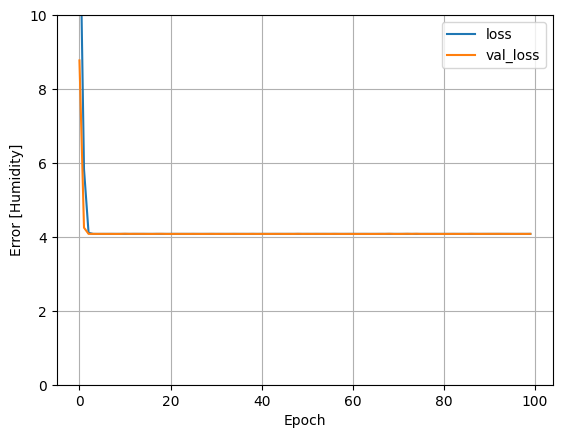

In [ ]:
plot_loss(history)

Then we store the results of the test set for later

In [ ]:
test_results = {}

test_results['Humidity_model'] = Humidity_model.evaluate(
    test_features['Humidity'],
    test_labels, verbose=0)

Linear Regresssion with Multiple Inputs

Here, the set up is almost identical

In [ ]:
#First, create a two-step keras sequential model

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 63ms/step


array([[ 1.417],
       [ 0.33 ],
       [-3.274],
       [-1.644],
       [ 0.087],
       [-1.283],
       [ 0.762],
       [-4.444],
       [-0.789],
       [ 0.667]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_2/kernel:0' shape=(7, 1) dtype=float32, numpy=
array([[ 0.665],
       [-0.027],
       [-0.74 ],
       [-0.564],
       [ 0.13 ],
       [ 0.454],
       [ 0.2  ]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3min 4s, sys: 9.86 s, total: 3min 14s
Wall time: 3min


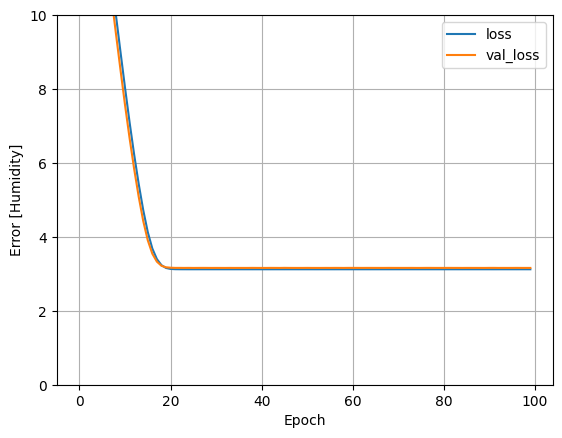

In [ ]:
plot_loss(history)

In [ ]:
#Then we save the results for later
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

Regression with a deep neural network

These models will contain a few more layers than the linear model:

The normalization layer, as before (with Humidity_normalizer for a single-input model and normalizer for a multiple-input model).
Two hidden, non-linear, Dense layers with the ReLU (relu) activation function nonlinearity.
A linear Dense single-output layer.
Both models will use the same training procedure, so the compile method is included in the build_and_compile_model function below.

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))
  return model

Firstly, with a single input

In [ ]:
dnn_Humidity_model = build_and_compile_model(Humidity_normalizer)

In [ ]:
dnn_Humidity_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 64)                128       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Now, we train the model with the keras model.fit function

In [ ]:
%%time
history = dnn_Humidity_model.fit(
    train_features_tensor[:, 1],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 3min 53s, sys: 10.8 s, total: 4min 3s
Wall time: 4min 23s


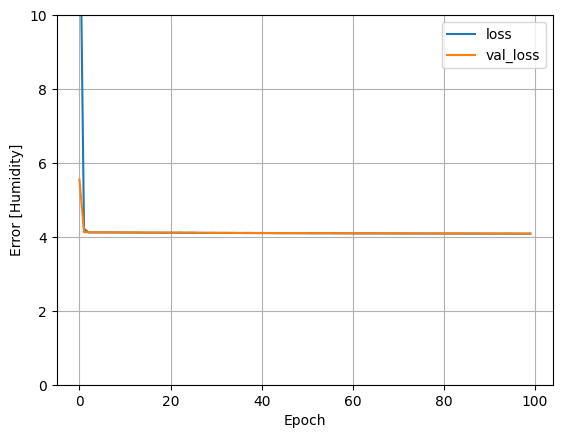

In [ ]:
plot_loss(history)

In [ ]:
#Now we collect the results
test_results['dnn_Humidity_model'] = dnn_Humidity_model.evaluate(
    test_features['Humidity'], test_labels,
    verbose=0)

Regression using a DNN and multiple inputs

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7)                15        
 n)                                                              
                                                                 
 dense_15 (Dense)            (None, 64)                512       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,752
Trainable params: 4,737
Non-trainable params: 15
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4min 2s, sys: 11.1 s, total: 4min 13s
Wall time: 4min 1s


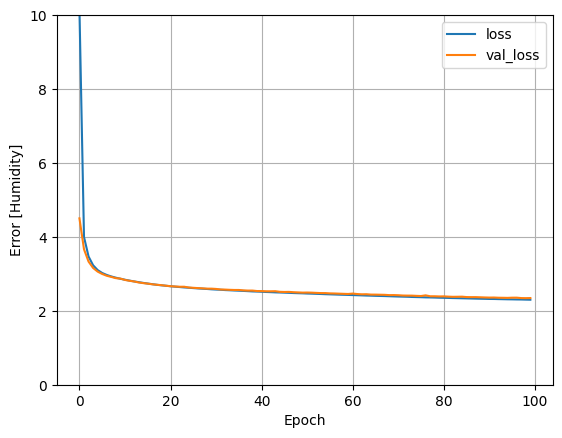

In [ ]:
plot_loss(history)

In [ ]:
#Collect the results
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

Performance

Now we review the performance of all the models

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
Humidity_model,94.636856
linear_model,3.118365
dnn_Humidity_model,274.935669
dnn_model,2.318544


Make Predictions

we are going to make predictions with the dnn_model on the test set using Keras Model.predict and review the loss:

328/328 [==============================] - 1s 3ms/step


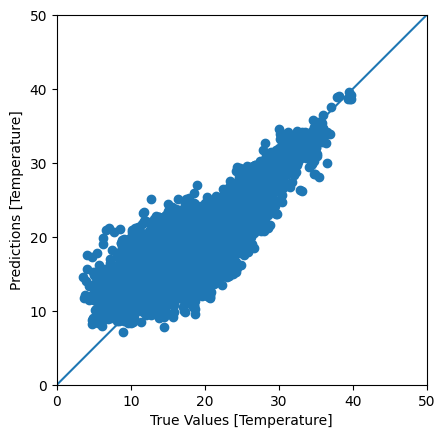

In [70]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Temperature]')
plt.ylabel('Predictions [Temperature]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


Now to check the error distribution

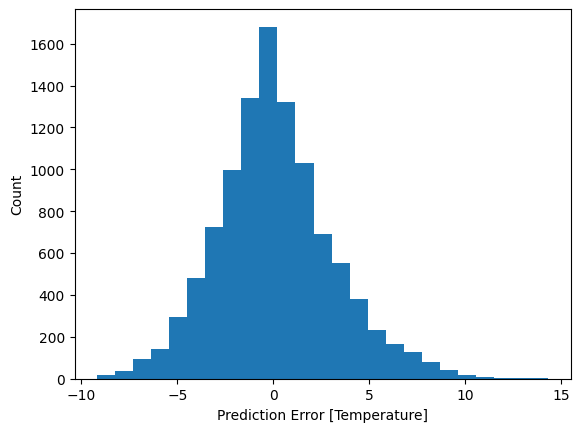

In [71]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Temperature]')
_ = plt.ylabel('Count')

Now, the model is saved.

In [72]:
dnn_model.save('dnn_model')

In [74]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [75]:
pd.DataFrame(test_results, index=['Mean absolute error [Temperature]']).T

,Mean absolute error [Temperature]
Humidity_model,94.636856
linear_model,3.118365
dnn_Humidity_model,274.935669
dnn_model,2.318544
reloaded,2.318544


PLEASE SEE THE SUBMITTED REPORT FOR AN IN-DEPTH EXPLANATION OF PROCEDURES CARRIED OUT IN THIS TASK SHEET.